In [1]:
import numpy as np
import pandas as pd
storage_options = {'User-Agent': 'Mozilla/5.0'}
url = "https://www.fraserinstitute.org/sites/default/files/economic-freedom-of-north-america-2022-for-website-allgovs.xlsx"
GDP = pd.read_csv("StateGDP.csv")
efw = pd.read_excel(url, storage_options=storage_options, sheet_name=None)
codes = pd.read_csv("taxitemcodesanddescriptions.csv", header = [0], index_col = [0])

In [2]:
state_dict = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ',
    'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 
    'Delaware': 'DE', 'Florida': 'FL', 
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA','Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

fips_dict = {
 '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR',
 '06': 'CA', '08': 'CO', '09': 'CT', '10': 'DE',
 '12': 'FL', '13': 'GA', '15': 'HI', '16': 'ID',
 '17': 'IL', '18': 'IN', '19': 'IA', '20': 'KS',
 '21': 'KY', '22': 'LA', '23': 'ME', '24': 'MD',
 '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS',
 '29': 'MO', '30': 'MT', '31': 'NE', '32': 'NV',
 '33': 'NH', '34': 'NJ', '35': 'NM', '36': 'NY',
 '37': 'NC', '38': 'ND', '39': 'OH', '40': 'OK',
 '41': 'OR', '42': 'PA', '44': 'RI', '45': 'SC',
 '46': 'SD', '47': 'TN', '48': 'TX', '49': 'UT',
 '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV',
 '55': 'WI', '56': 'WY'}
# '60': 'AS', '66': 'GU',
#  '69': 'MP', '72': 'PR', '78': 'VI'}
state_df = pd.DataFrame(state_dict, index = ["Abbr"]).T
fips_df = pd.DataFrame(fips_dict, index = ["State"]).T
state_names, state_abbrev = state_df.index, list(state_df["Abbr"].values)
state_abbrev
# state_abbrev

['AL',
 'AK',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'FL',
 'GA',
 'HI',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VT',
 'VA',
 'WA',
 'WV',
 'WI',
 'WY']

In [3]:
years = [1985,
 1990,
 1995,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]
efw = efw["Overall-scores(allgovs)"].dropna(subset = "Unnamed: 104").rename(columns = {"Overall allg Scores":"State"})
panel = efw[efw["Unnamed: 104"].str.contains(", US")]
panel = panel[["State"] + years]
panel["State"] = panel["State"].apply(lambda x:state_dict[x])
panel = panel.melt(id_vars=["State"], 
        var_name="Year", 
        value_name="EFW").set_index(["State", "Year"]).round(2)
panel

,,EFW
State,Year,
AL,1985,8.22
AK,1985,8.04
AZ,1985,8.25
AR,1985,8.20
CA,1985,8.07
...,...,...
VA,2020,7.94
WA,2020,7.90
WV,2020,7.87


In [4]:
GDP_years = list(GDP.keys())[-24:]
GDP = GDP[GDP["GeoName"].isin(state_names)]
GDP["State"] = GDP["GeoName"].apply(lambda x: state_dict[x])
GDP = GDP[["State","LineCode"] + GDP_years]
GDP = GDP.melt(id_vars=["State", "LineCode"], 
        var_name="Year", 
        value_name="GDP")

GDP["Year"] = GDP["Year"].astype(int)
GDP.set_index(["State", "Year"], inplace = True)
panel.loc[panel.index.isin(GDP.index),"GDP"] = GDP["GDP"][GDP["LineCode"]==1].astype(float)
panel

,,EFW,GDP
State,Year,,
AL,1985,8.22,NaN
AK,1985,8.04,NaN
AZ,1985,8.25,NaN
AR,1985,8.20,NaN
CA,1985,8.07,NaN
...,...,...,...
VA,2020,7.94,551760.3
WA,2020,7.90,618704.9
WV,2020,7.87,73709.2


In [5]:
# Maybe labels from 97 keys were entered by an intern who was filling in for the usual data person who was on leave,
fix_97_keys = pd.DataFrame({'VI':"VA", "AR":"AZ", 
                            'AR    .1':"AR", "LS":"LA",
                            "GE":"GA"}, 
                           index = ["Correction"]).T
fix_97_keys

,Correction
VI,VA
AR,AZ
AR .1,AR
LS,LA
GE,GA


In [6]:
# urls = ["https://www2.census.gov/govs/statetax/" +str(i)[-2:] + "staxcd.txt" for i in range(92,122)]
tax_dfs = {}
for year in range(1992,2022):
    key = str(year)[-2:] 
    try:    
        url = "https://www2.census.gov/govs/statetax/" +key + "staxcd.txt"
        tax_dfs[year] = pd.read_csv(url, index_col = [0])
        tax_dfs[year].rename(columns = {col:col.strip().replace("-State","") for col in tax_dfs[year].columns}, inplace = True)
        tax_dfs[year].rename(columns = {name:state_df.loc[name].values[0] for name in state_names}, inplace = True)
        if key == "97":
            tax_dfs[year].rename(columns = {
                wrong_key:fix_97_keys.loc[wrong_key].values[0] for wrong_key in fix_97_keys.index}, 
                                inplace = True)
        # adjust units from 1000s to millions
        tax_dfs[year] = tax_dfs[year][state_abbrev].div(1000)
#         tax_dfs[key].rename(columns = {col:col.strip() for col in tax_dfs[key].columns}, inplace = True)
    except:
        print("failed to download " + url)
tax_dfs.keys()

failed to download https://www2.census.gov/govs/statetax/16staxcd.txt
failed to download https://www2.census.gov/govs/statetax/17staxcd.txt
failed to download https://www2.census.gov/govs/statetax/18staxcd.txt
failed to download https://www2.census.gov/govs/statetax/19staxcd.txt
failed to download https://www2.census.gov/govs/statetax/20staxcd.txt
failed to download https://www2.census.gov/govs/statetax/21staxcd.txt


dict_keys([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [21]:
code_dfs = {}
for code in codes.index:
    code_dfs[code] = {}
    for year in tax_dfs.keys():
        code_dfs[code][year] = tax_dfs[year].loc[code] 
    code_dfs[code] = pd.DataFrame(code_dfs[code])

In [22]:
code_dfs["TotalTax"] = {}

for key, df in tax_dfs.items():
    code_dfs["TotalTax"][key] = df.sum()
for code, df in code_dfs.items():
    code_dfs[code] = pd.DataFrame(df)
    code_dfs[code].index.name = "State"
    code_dfs[code] = code_dfs[code].reset_index().melt(id_vars=["State"], 
        var_name="Year", 
        value_name=code).set_index(["State", "Year"])
    panel.loc[panel.index.isin(code_dfs[code].index),code] = code_dfs[code]
    panel[code + "/GDP"] = panel[code].div(panel["GDP"]).mul(100)
panel.dropna()


,,EFW,GDP,T01,T01/GDP,T09,T09/GDP,T10,T10/GDP,T11,T11/GDP,...,T50,T50/GDP,T51,T51/GDP,T53,T53/GDP,T99,T99/GDP,TotalTax,TotalTax/GDP
State,Year,,,,,,,,,,,,,,,,,,,,,
AL,2000,8.53,120132.9,179.828,0.149691,1701.885,1.416669,123.164,0.102523,0.113,0.000094,...,66.763,0.055574,26.487,0.022048,80.738,0.067207,0.000,0.000000,10885.538,9.061246
AK,2000,8.29,26815.8,44.608,0.166350,0.000,0.000000,12.655,0.047192,2.335,0.008708,...,2.455,0.009155,0.000,0.000000,708.390,2.641689,0.000,0.000000,2050.219,7.645563
AZ,2000,8.55,164609.9,296.706,0.180248,3632.686,2.206845,50.923,0.030936,0.677,0.000411,...,85.238,0.051782,0.000,0.000000,0.000,0.000000,0.000,0.000000,13231.369,8.038015
AR,2000,8.44,68740.4,481.893,0.701033,1706.645,2.482739,28.845,0.041962,0.000,0.000000,...,23.821,0.034654,16.861,0.024529,14.558,0.021178,4.183,0.006085,7543.961,10.974567
CA,2000,8.44,1366166.5,3330.868,0.243811,23457.385,1.717022,282.165,0.020654,0.000,0.000000,...,928.148,0.067938,0.000,0.000000,24.697,0.001808,0.000,0.000000,117679.607,8.613855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VA,2015,8.11,484530.8,32.712,0.006751,3793.215,0.782864,257.229,0.053088,0.105,0.000022,...,0.097,0.000020,345.747,0.071357,2.258,0.000466,109.909,0.022684,20536.885,4.238510
WA,2015,8.09,471702.8,2018.393,0.427895,12517.831,2.653754,331.405,0.070257,0.000,0.000000,...,150.295,0.031862,793.650,0.168252,43.893,0.009305,0.000,0.000000,20644.454,4.376581
WV,2015,8.03,70815.9,6.678,0.009430,1293.327,1.826323,18.159,0.025643,46.928,0.066268,...,0.000,0.000000,10.970,0.015491,668.880,0.944534,0.000,0.000000,5565.984,7.859794


In [20]:
panel.dropna()[code]#.div(
panel.dropna()["GDP"]#).dropna()

State  Year
AL     2000     120132.9
AK     2000      26815.8
AZ     2000     164609.9
AR     2000      68740.4
CA     2000    1366166.5
                 ...    
VA     2015     484530.8
WA     2015     471702.8
WV     2015      70815.9
WI     2015     306498.9
WY     2015      37860.7
Name: GDP, Length: 800, dtype: float64

C:\Users\JLCat\AppData\Local\Temp\ipykernel_35244\3528348229.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(panel[["EFW","GDP","TotalTax/GDP","T01/GDP"]].diff(5)


,EFW,GDP,TotalTax/GDP,T01/GDP
EFW,1.000000,-0.168195,0.127485,-0.021692
GDP,-0.168195,1.000000,-0.231994,-0.159454
TotalTax/GDP,0.127485,-0.231994,1.000000,0.327658
T01/GDP,-0.021692,-0.159454,0.327658,1.000000


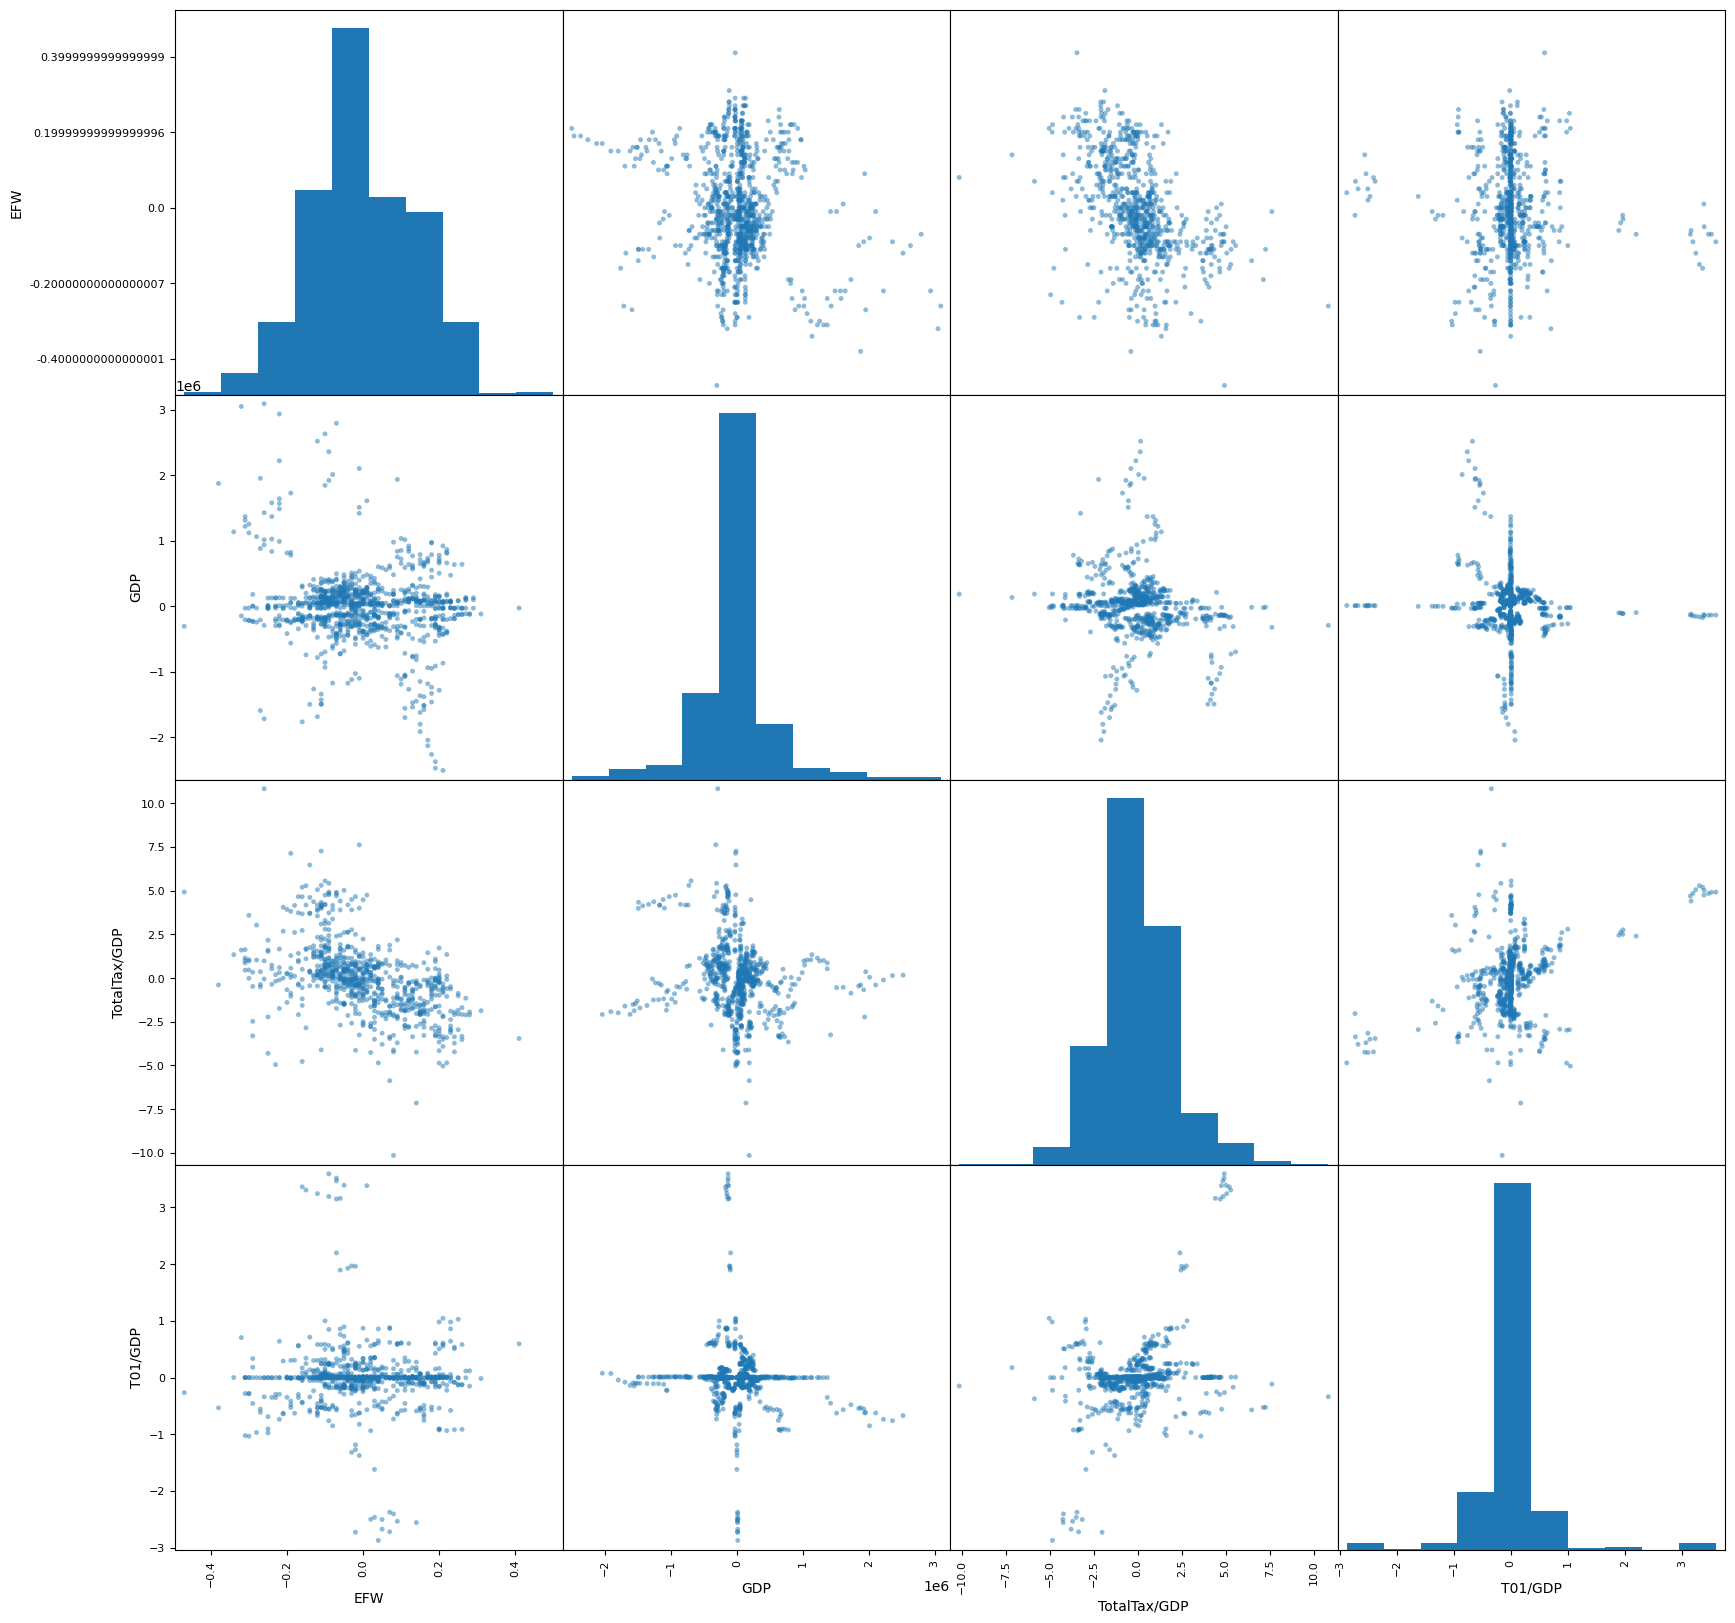

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (20,20))
pd.plotting.scatter_matrix(panel[["EFW","GDP","TotalTax/GDP","T01/GDP"]].diff(5)
                           , alpha = .5, s = 200 / 4, ax=ax)  
panel[["EFW","GDP","TotalTax/GDP","T01/GDP"]].corr()

In [10]:
# tax_dfs = {}
# for i in range(2018,2021):
#     key = str(i)#[-2:] 
#     try:
#         try:
#     #         url = "https://www2.census.gov/govs/statetax/" +key + "staxcd.txt"
#             url = "https://www2.census.gov/programs-surveys/stc/tables/" + key + "/FY" + key + "-STC-Category-Table.xlsx"
#             tax_dfs[key] = pd.read_excel(url, header = [4], index_col = [0]).iloc[:-2]#, index_col = [0])
#         except:
#             print("failed to download " + url)
#     except:
#         print("failed to download " + url)
# for state, col in tax_dfs[key].items():
#     try:
#         tax_dfs[key][state] = col.str.replace("X", "0").astype(float)
#     except:
#         pass
# tax_dfs[key]